In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.lines import Line2D

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

font = {'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
data_dir = "/homes/ukumaras/Downloads"
fast_base = pd.read_json(f"{data_dir}/results_remote_new/FAST_HYBRID_NO_ObjIndex_base_mbr_sub_timeline_1000000_500000.csv", lines=True)
fast_const_buffer = pd.read_json(f"{data_dir}/results_remote_new/FAST_HYBRID_NO_ObjIndex_const_buffer_mbr_sub_timeline_1000000_500000.csv", lines=True)

## Creation time

In [22]:
def plot_all_ins(df):
    plt.figure(figsize=(16,3))
    sns.lineplot(x='index', y='insert_time', data=df[df['stage'] == 'INSERT'].loc[:, ['index', 'insert_time']], color='red', alpha=0.4)
    sns.lineplot(x='index', y='search_time', data=df[df['stage'] == 'INSERT'].loc[:, ['index', 'search_time']], color='blue', alpha=0.4)
    plt.xlabel('timestamp')
    plt.ylabel('time (nano)')
    plt.ylim(0, 1000000)
    ax2 = plt.twinx()
    sns.lineplot(x='index', y='totalDescendCount', data=df[df['stage'] == 'INSERT'].loc[:, ['index', 'totalDescendCount']], color='green', alpha=0.8, ax=ax2)
    plt.ylabel('count')
    plt.ylim(0, 6000000)

    custom_lines = [Line2D([0], [0], color='red', alpha=0.4, lw=4),
                    Line2D([0], [0], color='blue', alpha=0.4, lw=4),
                    Line2D([0], [0], color='green', lw=4)]
    ax2.legend(custom_lines, ['Insert (Query Index)', 'Search (Obj. Index)', 'Total Descend Count'])

    plt.show()

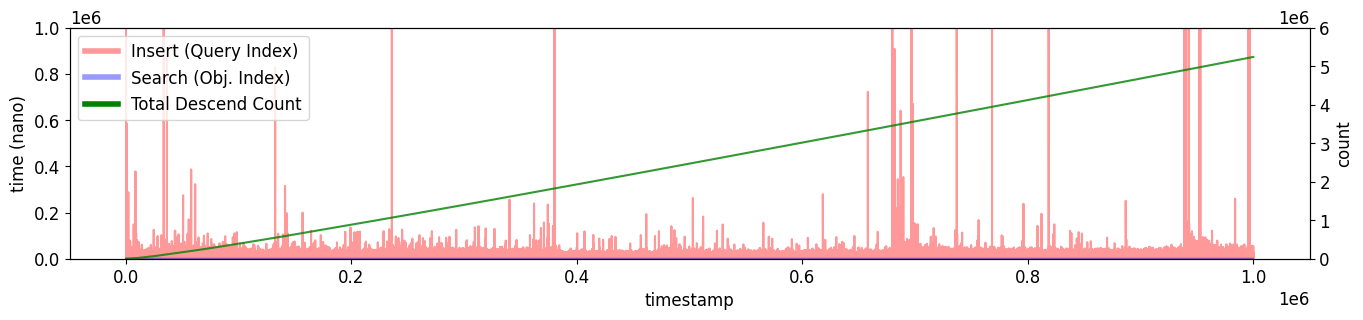

In [23]:
plot_all_ins(fast_base)

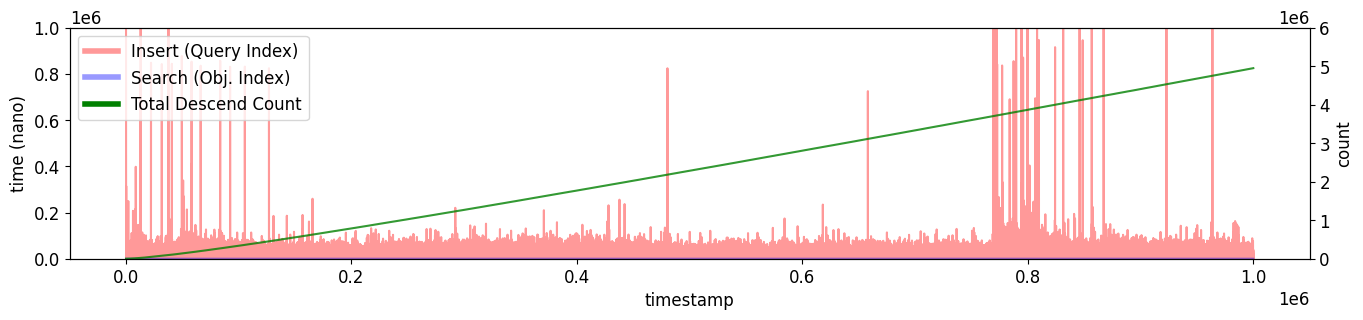

In [24]:
plot_all_ins(fast_const_buffer)

([0, 1, 2, 3],
 [Text(0, 0, 'obj. idx search (index creation)'),
  Text(1, 0, 'query idx insert (index creation)'),
  Text(2, 0, 'query idx search (obj. streaming)'),
  Text(3, 0, 'obj. idx insert (obj. streaming)')])

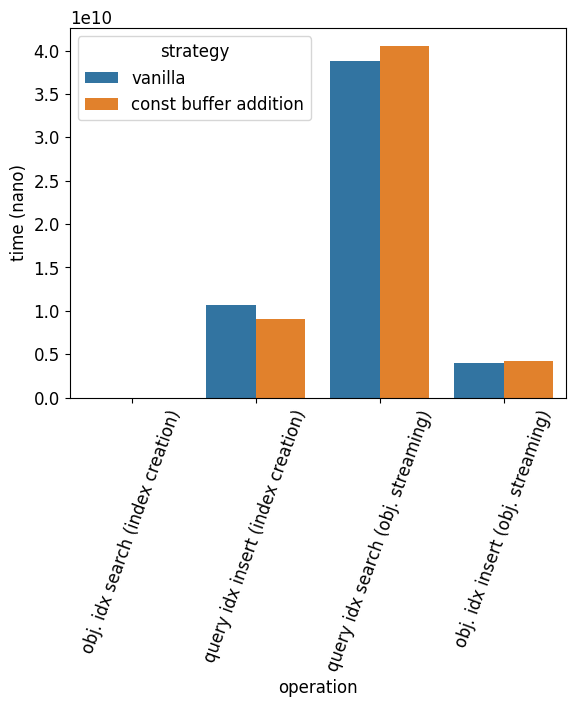

In [6]:
sum_map = [{"strategy": name, "obj. idx search (index creation)": df[df['stage'] == "INSERT"]['search_time'].sum(), "query idx insert (index creation)": df[df['stage'] == "INSERT"]['insert_time'].sum(), 
            "query idx search (obj. streaming)": df[df['stage'] == "SEARCH"]['search_time'].sum(), "obj. idx insert (obj. streaming)": df[df['stage'] == "SEARCH"]['insert_time'].sum()} 
           for name, df in [('vanilla', fast_base), ('const buffer addition', fast_const_buffer)]]
sum_df = pd.DataFrame(sum_map).melt(id_vars=['strategy'], var_name="operation", value_name="time (nano)")
sns.barplot(x='operation', y='time (nano)', hue='strategy', data=sum_df)
plt.xticks(rotation=70)

# Search time

In [7]:
fast_base[(fast_base['stage'] == 'SEARCH') & (fast_base['search_time'] > 10000000)].sort_values('search_time', ascending=False)

,index,search_time,insert_time,ar,descendCount,totalDescendCount,level,stage
1003053,103053,163222476,3033,0,-1,5240590,-1,SEARCH
1443506,543506,86704533,51741,0,-1,5240590,-1,SEARCH
1108018,208018,68183971,10572,0,-1,5240590,-1,SEARCH
1372057,472057,65744082,8272,0,-1,5240590,-1,SEARCH
1310829,410829,59852760,6224,0,-1,5240590,-1,SEARCH
1026138,126138,54076347,12482,0,-1,5240590,-1,SEARCH
1175690,275690,52860212,12940,0,-1,5240590,-1,SEARCH
1216563,316563,52310359,1591,0,-1,5240590,-1,SEARCH
1258532,358532,49728282,8389,0,-1,5240590,-1,SEARCH
1132429,232429,46628945,12296,0,-1,5240590,-1,SEARCH


In [8]:
fast_const_buffer[(fast_const_buffer['stage'] == 'SEARCH') & (fast_const_buffer['search_time'] > 10000000)].sort_values('search_time', ascending=False)

,index,search_time,insert_time,ar,descendCount,totalDescendCount,level,stage
1050081,150081,137695903,18399,0,-1,4949723,-1,SEARCH
1332931,432931,76226461,10515,0,-1,4949723,-1,SEARCH
1337765,437765,75310676,16128,0,-1,4949723,-1,SEARCH
1437986,537986,62855086,10484,0,-1,4949723,-1,SEARCH
1227005,327005,48509480,9473,0,-1,4949723,-1,SEARCH
1267285,367285,46917455,5022,0,-1,4949723,-1,SEARCH
1388671,488671,44203169,20888,0,-1,4949723,-1,SEARCH
1115229,215229,38401191,61514,0,-1,4949723,-1,SEARCH
1068679,168679,37728821,7765,0,-1,4949723,-1,SEARCH
1359889,459889,37477340,10381,0,-1,4949723,-1,SEARCH


In [9]:
def plot_all_search(df):
    plt.figure(figsize=(16,3))
    sns.lineplot(x='index', y='insert_time', data=df[df['stage'] == 'SEARCH'].loc[:, ['index', 'insert_time']], color='red', alpha=0.4)
    sns.lineplot(x='index', y='search_time', data=df[df['stage'] == 'SEARCH'].loc[:, ['index', 'search_time']], color='blue', alpha=0.4)
    plt.xlabel('timestamp')
    plt.ylabel('time (milis)')
    plt.ylim(0, 10000000)
    ax2 = plt.twinx()
    sns.lineplot(x='index', y='totalDescendCount', data=df[df['stage'] == 'SEARCH'].loc[:, ['index', 'totalDescendCount']], color='green', alpha=0.8, ax=ax2)
    plt.ylabel('count')
    # plt.ylim(0, 50000000)

    custom_lines = [Line2D([0], [0], color='red', alpha=0.4, lw=4),
                    Line2D([0], [0], color='blue', alpha=0.4, lw=4),
                    Line2D([0], [0], color='green', lw=4)]
    ax2.legend(custom_lines, ['Insert (Obj. Index)', 'Search (Query Index)', 'Total Descend Count'])

    plt.show()

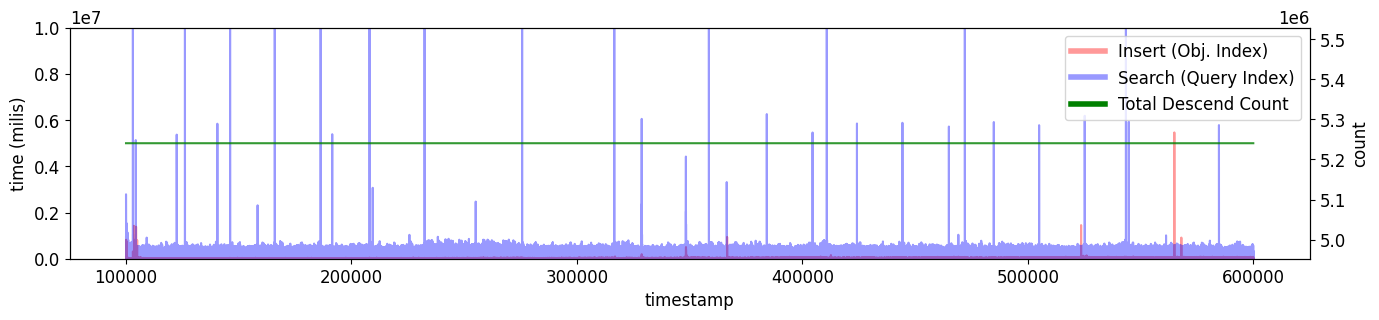

In [10]:
plot_all_search(fast_base)

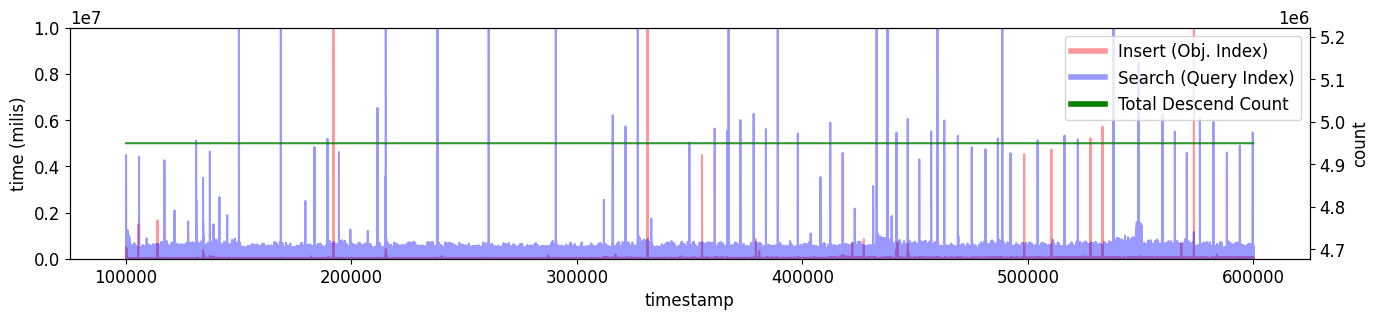

In [11]:
plot_all_search(fast_const_buffer)

In [12]:
fast_const_buffer[fast_const_buffer['stage'] == 'SEARCH']

,index,search_time,insert_time,ar,descendCount,totalDescendCount,level,stage
1000000,100000,513961,66797,0,-1,4949723,-1,SEARCH
1000001,100001,154884,35594,0,-1,4949723,-1,SEARCH
1000002,100002,208831,127920,0,-1,4949723,-1,SEARCH
1000003,100003,4487121,47319,0,-1,4949723,-1,SEARCH
1000004,100004,287388,37153,0,-1,4949723,-1,SEARCH
...,...,...,...,...,...,...,...,...
1499995,599995,128638,22580,0,-1,4949723,-1,SEARCH
1499996,599996,24786,6492,0,-1,4949723,-1,SEARCH
1499997,599997,13418,3745,0,-1,4949723,-1,SEARCH
1499998,599998,12874,2765,0,-1,4949723,-1,SEARCH


## Both

In [13]:
fail

NameError: name 'fail' is not defined

In [ ]:
def plot_all_both(df):
    plt.figure(figsize=(16,3))
    sns.lineplot(x='index', y='insert_time', data=df.loc[:, ['index', 'insert_time']], color='red', alpha=0.4)
    sns.lineplot(x='index', y='search_time', data=df.loc[:, ['index', 'search_time']], color='blue', alpha=0.4)
    plt.xlabel('timestamp')
    plt.ylabel('time (milis)')
    plt.ylim(0, 100000000)
    ax2 = plt.twinx()
    sns.lineplot(x='index', y='totalDescendCount', data=df.loc[:, ['index', 'totalDescendCount']], color='green', alpha=0.8, ax=ax2)
    plt.ylabel('count')
    plt.ylim(0, 50000000)

    custom_lines = [Line2D([0], [0], color='red', alpha=0.4, lw=4),
                    Line2D([0], [0], color='blue', alpha=0.4, lw=4),
                    Line2D([0], [0], color='green', lw=4)]
    ax2.legend(custom_lines, ['Insert (Obj. Index -> Query Index)', 'Search (Query Index -> Obj. Index)', 'Total Descend Count'])

    plt.show()

KeyboardInterrupt: 

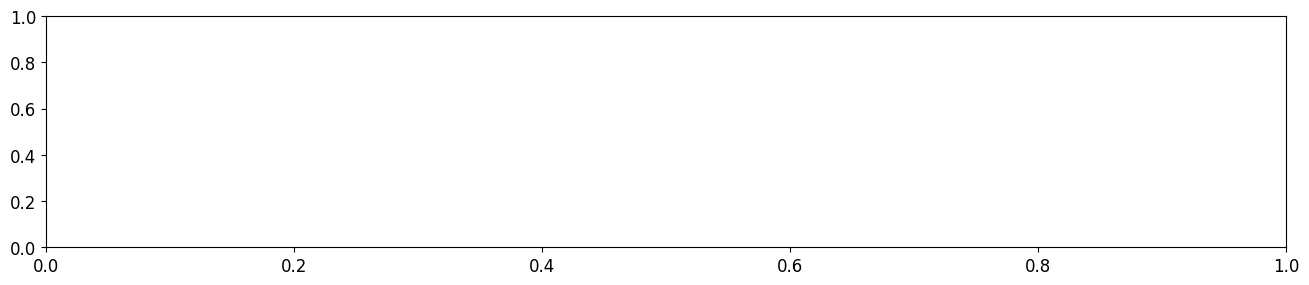

In [ ]:
plot_all_both(fast_base)

In [ ]:
plot_all_both(fast_const_buffer)